In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# final merged all four tables(oolpb_m.csv)
url = "https://drive.google.com/file/d/11k4BWbNhaJw9FRH36kBpyg3r2KbL3u0x/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
final = pd.read_csv(path)

In [4]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53195 entries, 0 to 53194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          53195 non-null  int64  
 1   created_date      53195 non-null  object 
 2   total_paid        53195 non-null  float64
 3   state             53195 non-null  object 
 4   id                53195 non-null  int64  
 5   id_order          53195 non-null  int64  
 6   product_id        53195 non-null  int64  
 7   product_quantity  53195 non-null  int64  
 8   sku               53195 non-null  object 
 9   unit_price        53195 non-null  float64
 10  date              53195 non-null  object 
 11  short             53195 non-null  object 
 12  name              53195 non-null  object 
 13  desc              53195 non-null  object 
 14  price             53195 non-null  float64
 15  in_stock          53195 non-null  int64  
 16  type              53184 non-null  object

In [5]:
final["created_date"] = pd.to_datetime(final["created_date"])
final["date"] = pd.to_datetime(final["date"])

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53195 entries, 0 to 53194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53195 non-null  int64         
 1   created_date      53195 non-null  datetime64[ns]
 2   total_paid        53195 non-null  float64       
 3   state             53195 non-null  object        
 4   id                53195 non-null  int64         
 5   id_order          53195 non-null  int64         
 6   product_id        53195 non-null  int64         
 7   product_quantity  53195 non-null  int64         
 8   sku               53195 non-null  object        
 9   unit_price        53195 non-null  float64       
 10  date              53195 non-null  datetime64[ns]
 11  short             53195 non-null  object        
 12  name              53195 non-null  object        
 13  desc              53195 non-null  object        
 14  price             5319

In [7]:
final.created_date.max() 


Timestamp('2018-03-14 12:03:52')

In [8]:
final.created_date.min()

Timestamp('2017-01-01 01:51:47')

**•	How products should be classified into different categories to simplify reports and analysis.**

In [9]:
top_30_type = (
    final.groupby(["type"])["name"]
    .count()
    .sort_values(ascending = False)
)
top_30_type.head(30)

type
11865403    4373
11935397    3872
1364        3135
11905404    3123
5384        2319
12215397    1982
12655397    1832
12585395    1815
1296        1489
1230        1409
1405        1182
1231        1123
12175397    1093
1325        1067
13835403     971
42945397     860
12755395     854
13555403     822
13615399     821
13855401     818
10142        802
51601716     796
5398         781
12635403     713
1433         707
1229         684
14305406     683
12995397     670
13005399     669
1298         567
Name: name, dtype: int64

In [10]:
final.loc[final["type"] == "51601716", :]

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long
6763,365911,2017-06-15 13:55:14,222.99,Completed,1268700,365911,0,1,PAC2053,219.00,2017-06-15 13:14:56,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6764,368389,2017-06-23 13:00:07,202.99,Completed,1273767,368389,0,1,PAC2053,199.00,2017-06-23 12:58:20,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6765,369940,2017-06-28 13:58:12,205.99,Completed,1276864,369940,0,1,PAC2053,199.00,2017-06-28 13:45:06,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6766,370462,2017-06-29 20:30:33,404.99,Completed,1277983,370462,0,1,PAC2053,199.00,2017-06-29 20:25:57,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
6767,374982,2017-07-10 16:49:16,202.99,Completed,1288576,374982,0,1,PAC2053,199.00,2017-07-10 16:45:56,PAC,Second hand - iPhone 5s 16GB Space Gray,Apple iPhone 5s 16GB Second Hand Free Color Gr...,409.0,0,51601716,Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51714,508659,2018-02-09 09:36:59,322.99,Completed,1607229,508659,0,1,AP20305,319.00,2018-02-09 09:31:46,AP2,Like new - Apple iPhone 32GB Rose Gold,Refurbished 32GB iPhone rose gold color,419.0,0,51601716,Apple
51715,511648,2018-02-14 18:08:23,325.99,Completed,1614138,511648,0,1,AP20305,319.00,2018-02-14 18:03:58,AP2,Like new - Apple iPhone 32GB Rose Gold,Refurbished 32GB iPhone rose gold color,419.0,0,51601716,Apple
51725,431624,2017-11-23 19:27:37,289.11,Completed,1421325,431624,0,1,AP20258,284.12,2017-11-22 11:56:51,AP2,Like new - Apple iPhone 16GB Silver,Apple iPhone SE Free Refurbished 16GB Color Si...,489.0,0,51601716,Apple
51787,497787,2018-01-24 17:26:37,325.99,Completed,1578736,497787,0,1,AP20413,319.00,2018-01-24 17:14:06,AP2,Like new - Apple iPhone 32GB Gold,SE iPhone with 4-inch screen 32 free GB.,419.0,0,51601716,Apple


In [11]:
final.loc[final['type'] == '11865403', 'category'] = 'Accessories'  
final.loc[final['type'] == '11935397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '1364', 'category'] = 'Storage'
final.loc[final['type'] == '11905404', 'category'] = 'Accessories'
final.loc[final['type'] == '5384', 'category'] = 'Accessories'
final.loc[final['type'] == '12215397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '12655397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '12585395', 'category'] = 'Accessories'
final.loc[final['type'] == '1296', 'category'] = 'Monitors'
final.loc[final['type'] == '1230', 'category'] = 'Accessories'
final.loc[final['type'] == '1405', 'category'] = 'Accessories'
final.loc[final['type'] == '1231', 'category'] = 'Apple Care'
final.loc[final['type'] == '12175397', 'category'] = 'Storage'
final.loc[final['type'] == '1325', 'category'] = 'Accessories'
final.loc[final['type'] == '13835403', 'category'] = 'Accessories'
final.loc[final['type'] == '42945397', 'category'] = 'Storage'
final.loc[final['type'] == '12755395', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '13555403', 'category'] = 'Accessories'
final.loc[final['type'] == '13615399', 'category'] = 'Accessories'
final.loc[final['type'] == '13855401', 'category'] = 'Monitors'
final.loc[final['type'] == '10142', 'category'] = 'Accessories'
final.loc[final['type'] == '51601716', 'category'] = 'Second hand iPhones'
final.loc[final['type'] == '5398', 'category'] = 'Accessories'
final.loc[final['type'] == '12635403', 'category'] = 'Accessories'
final.loc[final['type'] == '1433', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '1229', 'category'] = 'Accessories'
final.loc[final['type'] == '14305406', 'category'] = 'Storage'
final.loc[final['type'] == '12995397', 'category'] = 'State Drives/Hard Drives'
final.loc[final['type'] == '13005399', 'category'] = 'Storage'
final.loc[final['type'] == '1298', 'category'] = 'Accessories'
final.loc[(final['type'] != '11865403') & (final['type'] != '11935397') & (final['type'] != '1364')
                             & (final['type'] != '11905404') & (final['type'] != '5384') & (final['type'] != '12215397') 
                             & (final['type'] != '12655397') & (final['type'] != '12585395') & (final['type'] != '1296')
                             & (final['type'] != '1230') & (final['type'] != '1405') & (final['type'] != '1231') 
                             & (final['type'] != '12175397') & (final['type'] != '1325') & (final['type'] != '13835403')
                             & (final['type'] != '42945397') & (final['type'] != '12755395') & (final['type'] != '13555403')
                             & (final['type'] != '13615399') & (final['type'] != '13855401') & (final['type'] != '10142')
                             & (final['type'] != '51601716') & (final['type'] != '5398') & (final['type'] != '12635403')
                             & (final['type'] != '1433') & (final['type'] != '1229') & (final['type'] != '14305406')
                             & (final['type'] != '12995397') & (final['type'] != '13005399') & (final['type'] != '1298')
                              , 'category'] = 'Other' 
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories


**To find discount.**

In [12]:
discount = final['price'] - final['unit_price']
final['discount'] = discount
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,long,category,discount
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,2017-01-18 19:12:49,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,2017-01-07 17:13:59,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,2017-01-09 12:22:46,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,2017-01-10 15:23:11,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,2018-03-09 09:48:18,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,2018-03-09 11:19:26,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00


In [13]:
final ['percentage'] = (final ['discount'] / final ['price']*100).round(2)
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,short,name,desc,price,in_stock,type,long,category,discount,percentage
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83,7.74
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,...,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,...,QAR,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46


In [14]:
unit_price_total = final['unit_price'] * final['product_quantity']
final['unit_price_total'] = unit_price_total
final

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,name,desc,price,in_stock,type,long,category,discount,percentage,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,10.83,7.74,129.16
1,269440,2017-01-18 19:15:00,213.98,Completed,1151714,269440,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
2,304328,2017-01-07 17:27:26,177.97,Completed,1133913,304328,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
3,305628,2017-01-09 12:30:07,140.98,Completed,1136917,305628,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
4,306550,2017-01-10 15:28:00,143.98,Completed,1139281,306550,0,1,LAC0212,136.99,...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1,11935397,LaCie,State Drives/Hard Drives,3.00,2.14,136.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53190,523660,2018-03-09 09:50:36,83.98,Completed,1641088,523660,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53191,523717,2018-03-09 11:21:24,84.98,Completed,1641202,523717,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53192,524124,2018-03-09 20:21:23,84.98,Completed,1642236,524124,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99
53193,525381,2018-03-11 12:01:18,83.98,Completed,1645994,525381,0,1,QAR0007,79.99,...,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,11905404,Qardio,Accessories,50.00,38.46,79.99


**Top discounted products**



In [15]:
product_discount_category = (
    final.groupby(["category"])["percentage"]
    .mean(["percentage"])
    .nlargest(30).round(0))
product_discount_category

category
Accessories                 26.0
Apple Care                  22.0
Other                       20.0
State Drives/Hard Drives    18.0
Storage                     16.0
Second hand iPhones         15.0
Monitors                    12.0
Name: percentage, dtype: float64

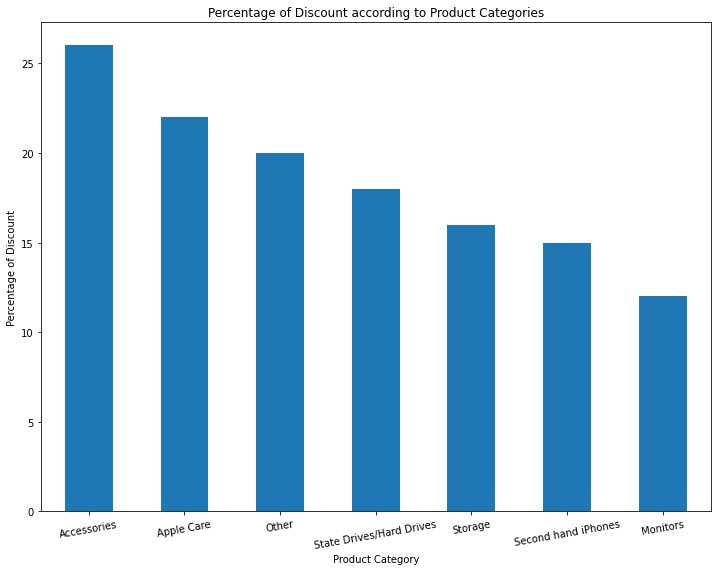

In [16]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(12, 9))
product_discount_category.plot(kind = 'bar');
plt.xticks(rotation=10)
plt.title("Percentage of Discount according to Product Categories");
plt.xlabel("Product Category");
plt.ylabel("Percentage of Discount");

**Top ordered products**

In [17]:
product_order_category = (
    final.groupby(["category"])["order_id"]
    .count()
    .nlargest(30)
)
product_order_category

category
Accessories                 21449
Other                       11163
State Drives/Hard Drives     9917
Storage                      6440
Monitors                     2307
Apple Care                   1123
Second hand iPhones           796
Name: order_id, dtype: int64

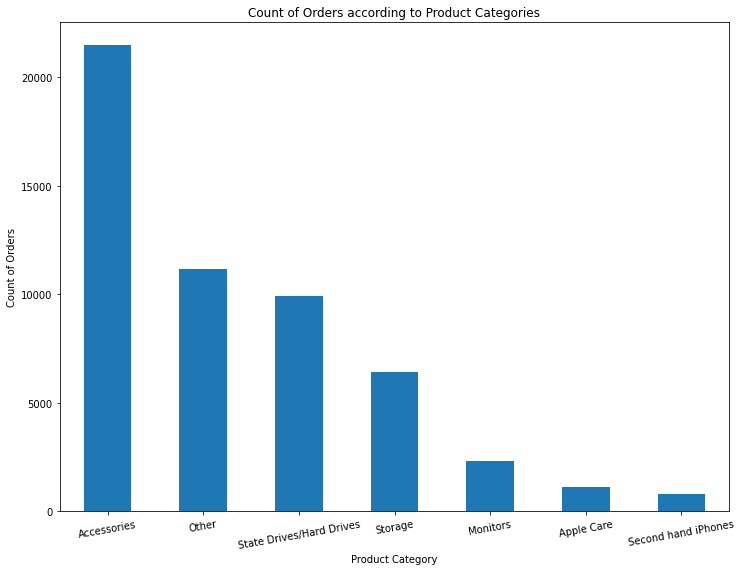

In [18]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(12, 9))
product_order_category.plot(kind = "bar");
plt.xticks(rotation=10)
plt.title("Count of Orders according to Product Categories");
plt.xlabel("Product Category");
plt.ylabel("Count of Orders");

**Top Revenue products**

In [19]:
product_revenue_category = (
    final.groupby(["category"])["unit_price"]
    .sum(["unit_price"]).round(2)
    .nlargest(30))
product_revenue_category


category
Other                       2197600.14
State Drives/Hard Drives    1617299.21
Accessories                 1451166.49
Storage                      910645.34
Monitors                     638086.60
Second hand iPhones          307401.46
Apple Care                    85098.53
Name: unit_price, dtype: float64

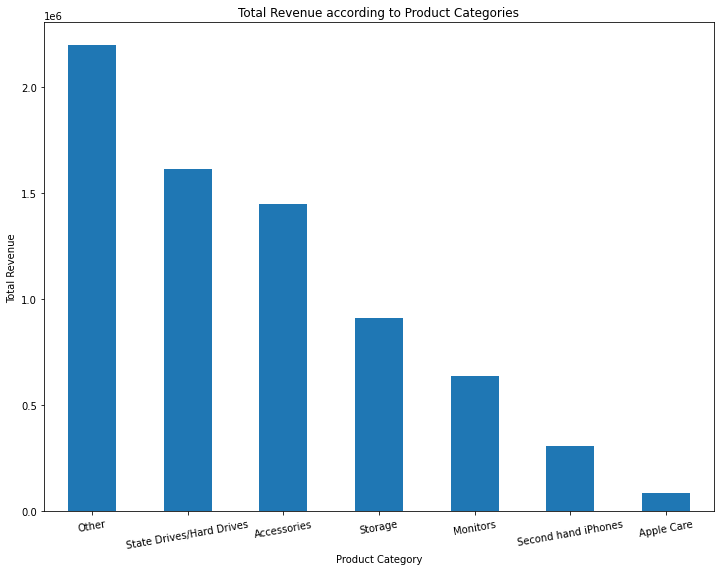

In [20]:
plt.figure(figsize=(12, 9))
product_revenue_category.plot(kind = "bar");
plt.xticks(rotation=10);
plt.title("Total Revenue according to Product Categories");
plt.xlabel("Product Category");
plt.ylabel("Total Revenue");

In [21]:
trend = final.groupby([pd.Grouper(key='created_date',freq='Q'),'category'])['unit_price','percentage'].mean()
trend


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


unit_price  percentage
created_date category                                        
2017-03-31   Accessories                57.867873   30.779337
             Apple Care                 85.960075   22.629478
             Monitors                  301.227895   11.587368
             Other                     102.355402   20.129001
             Second hand iPhones       447.710000    6.728571
             State Drives/Hard Drives  148.807224   16.312576
             Storage                   105.232855   18.309103
2017-06-30   Accessories                65.651675   21.656119
             Apple Care                 88.145769   16.469808
             Monitors                  266.864599    8.843240
             Other                     163.739608   12.985728
             Second hand iPhones       420.432613   10.012703
             State Drives/Hard Drives  162.304149   14.470065
             Storage                   125.199128   17.145267
2017-09-30   Accessories                55.277439   27.832538
             Apple Care                 77.216356   17.407034
             Monitors                  265.345490   13.949739
             Other                     194.498183   21.628326
             Second hand iPhones       384.136526   14.896888
             State Drives/Hard Drives  171.386298   17.563651
             Storage                   124.093050   19.465737
2017-12-31   Accessories                79.480218   25.597051
             Apple Care                 71.285520   23.734992
             Monitors                  304.835409   14.021530
             Other                     252.273402   18.432088
             Second hand iPhones       379.276931   16.148303
             State Drives/Hard Drives  165.978960   19.385500
             Storage                   182.730928   13.761079
2018-03-31   Accessories                66.150430   25.407579
             Apple Care                 79.027423   20.783660
             Monitors                  239.519011   11.178325
             Other                     191.163400   24.238964
             Second hand iPhones       362.722429   17.016429
             State Drives/Hard Drives  163.032725   20.807445
             Storage                   155.077864   10.291467

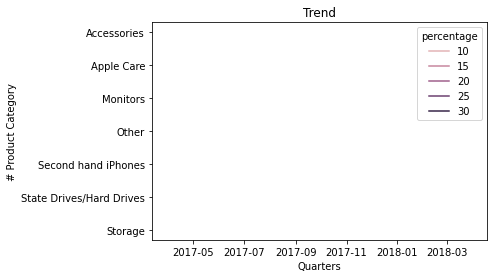

In [22]:
chart = sns.lineplot(x='created_date', y='category', data=trend, 
                     hue = 'percentage',markers=True);
chart.set(title='Trend', ylabel='# Product Category', xlabel="Quarters");

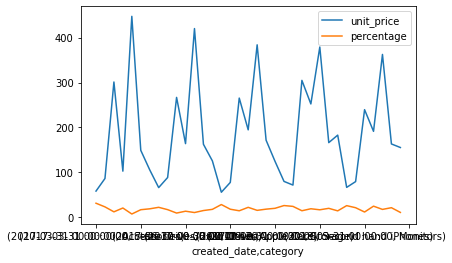

In [23]:
trend.plot();

In [24]:
order_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["order_id"]
   .count()
)
order_overview_df = pd.DataFrame(order_overview)
order_overview_df

,order_id
created_date,
2017-01-01,121
2017-01-02,367
2017-01-03,307
2017-01-04,129
2017-01-05,153
...,...
2018-03-10,79
2018-03-11,74
2018-03-12,142


In [25]:
disc_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["discount"]
   .mean()
)
disc_overview_df = pd.DataFrame(disc_overview)
disc_overview_df

,discount
created_date,
2017-01-01,24.627934
2017-01-02,16.190245
2017-01-03,17.741042
2017-01-04,15.979922
2017-01-05,52.182288
...,...
2018-03-10,27.400506
2018-03-11,30.016216
2018-03-12,28.844014


In [26]:
data_overview_1 = order_overview_df.merge(disc_overview_df, on = 'created_date')
data_overview_1

,order_id,discount
created_date,,
2017-01-01,121,24.627934
2017-01-02,367,16.190245
2017-01-03,307,17.741042
2017-01-04,129,15.979922
2017-01-05,153,52.182288
...,...,...
2018-03-10,79,27.400506
2018-03-11,74,30.016216
2018-03-12,142,28.844014


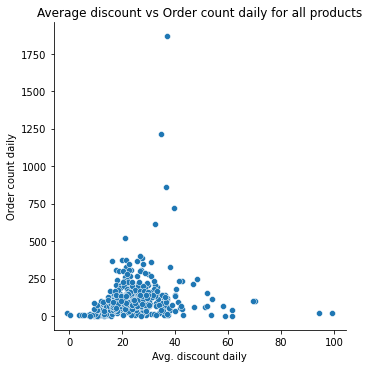

In [27]:
chart = sns.relplot(data=data_overview_1,
            x="discount",
            y="order_id");
chart.set(title='Average discount vs Order count daily for all products', ylabel='Order count daily', xlabel="Avg. discount daily");

In [28]:
revenue_overview = (
    final.groupby([pd.Grouper(key='created_date',freq='D')])["unit_price_total"]
   .sum()
)
revenue_overview_df = pd.DataFrame(revenue_overview)
revenue_overview_df

,unit_price_total
created_date,
2017-01-01,16343.03
2017-01-02,37644.65
2017-01-03,35696.76
2017-01-04,16463.16
2017-01-05,11996.38
...,...
2018-03-10,8382.58
2018-03-11,9135.05
2018-03-12,23635.13


In [29]:
data_overview_2 = revenue_overview_df.merge(disc_overview_df, on = 'created_date')
data_overview_2

,unit_price_total,discount
created_date,,
2017-01-01,16343.03,24.627934
2017-01-02,37644.65,16.190245
2017-01-03,35696.76,17.741042
2017-01-04,16463.16,15.979922
2017-01-05,11996.38,52.182288
...,...,...
2018-03-10,8382.58,27.400506
2018-03-11,9135.05,30.016216
2018-03-12,23635.13,28.844014


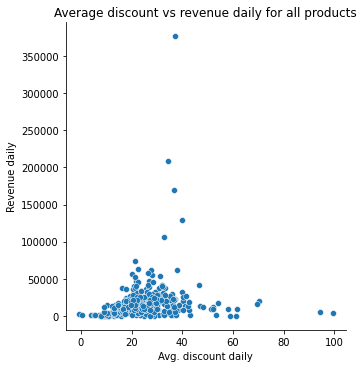

In [30]:
chart = sns.relplot(data=data_overview_2,
            x="discount",
            y="unit_price_total");
chart.set(title='Average discount vs revenue daily for all products', ylabel='Revenue daily', xlabel="Avg. discount daily");